In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando base de dados

In [3]:
dados = pd.read_json('Telco-Customer-Churn.json')

In [4]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
dados.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
dados.shape

(7267, 6)

# Observação
Todas as 7267 entradas da base de dados não são nulas mas ainda podem existir inconsistências.

# Vamos traduzir e padronizar os rótulos do Data Frame

In [8]:
rotulos = {'customerID': 'cliente_id', 'Churn': 'churn', 'customer': 'dados_cliente', 'phone': 'servicos_telefone', 'internet': 'servicos_internet','account': 'detalhes_contrato'}
dados.rename(columns = rotulos, inplace = True)
dados.head()

,cliente_id,churn,dados_cliente,servicos_telefone,servicos_internet,detalhes_contrato
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Analisando e buscando inconformidades dentro de cada campo do DataFrame

## Verificando cliente_id

In [9]:
dados.cliente_id.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [10]:
dados.cliente_id.value_counts()

0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: cliente_id, Length: 7267, dtype: int64

## Verificando churn

In [11]:
dados.churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [12]:
dados.churn.value_counts()

No     5174
Yes    1869
        224
Name: churn, dtype: int64

In [13]:
dados.churn.value_counts(normalize = True) * 100

No     71.198569
Yes    25.719004
        3.082427
Name: churn, dtype: float64

### Aproximadamente 3% das entradas de dados apresentam problemas na coluna churn, sendo assim, serão removidas.

In [14]:
limpeza_churn = dados.churn != ''
dados = dados[limpeza_churn]
churn_traducao = {'No': 'Não', 'Yes': 'Sim'}
dados.churn.replace(churn_traducao, inplace = True)
dados.shape[0]

7043

## Base de dados foi reconstruída removendo as entradas vazias de evasão

In [15]:
dados

,cliente_id,churn,dados_cliente,servicos_telefone,servicos_internet,detalhes_contrato
0,0002-ORFBO,Não,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,Não,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Sim,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Sim,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Sim,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,Não,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Sim,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,Não,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,Não,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [16]:
dados.churn.unique()

array(['Não', 'Sim'], dtype=object)

## Agora vamos normalizar as demais colunas do Data Frame
### Iniciando com dados_cliente

In [17]:
dados_cliente = pd.json_normalize(dados.dados_cliente)
clientes_rotulos = {'gender': 'genero', 'SeniorCitizen': 'idoso', 'Partner': 'casado', 'Dependents': 'dependentes', 'tenure': 'duracao_contrato'}
dados_cliente.rename(columns = clientes_rotulos, inplace = True)
dados_cliente.head()

,genero,idoso,casado,dependentes,duracao_contrato
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [18]:
dados_cliente.genero.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
dados_cliente.idoso.unique()

array([0, 1])

In [20]:
dados_cliente.casado.unique()

array(['Yes', 'No'], dtype=object)

In [21]:
dados_cliente.dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
dados_cliente.duracao_contrato.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [23]:
dados_cliente.shape

(7043, 5)

In [24]:
traducao_genero = {'Female': 'Feminino', 'Male': 'Masculino'}
traducao_idoso = {0: 'Não', 1: 'Sim'}
traducao_casado = {'Yes': 'Sim', 'No': 'Não'}
traducao_dependentes = {'Yes': 'Sim', 'No': 'Não'}
dados_cliente.genero.replace(traducao_genero, inplace = True)
dados_cliente.idoso.replace(traducao_idoso, inplace = True)
dados_cliente.casado.replace(traducao_casado, inplace = True)
dados_cliente.dependentes.replace(traducao_dependentes, inplace = True)
dados_cliente.head()

,genero,idoso,casado,dependentes,duracao_contrato
0,Feminino,Não,Sim,Sim,9
1,Masculino,Não,Não,Não,9
2,Masculino,Não,Não,Não,4
3,Masculino,Sim,Sim,Não,13
4,Feminino,Sim,Sim,Não,3


In [25]:
dados_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genero            7043 non-null   object
 1   idoso             7043 non-null   object
 2   casado            7043 non-null   object
 3   dependentes       7043 non-null   object
 4   duracao_contrato  7043 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## Normalizando servicos_telefone

In [26]:
servicos_telefone = pd.json_normalize(dados.servicos_telefone)
telefone_rotulos = {'PhoneService': 'assinatura_telefone','MultipleLines': 'linhas_extras'}
servicos_telefone.rename(columns = telefone_rotulos, inplace = True)
servicos_telefone.head()

,assinatura_telefone,linhas_extras
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [27]:
servicos_telefone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   assinatura_telefone  7043 non-null   object
 1   linhas_extras        7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [28]:
servicos_telefone.assinatura_telefone.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
servicos_telefone.linhas_extras.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [30]:
traducao_assinatura = {'Yes': 'Sim', 'No': 'Não'}
traducao_linhas_extras = {'No': 'Não', 'Yes': 'Sim', 'No phone service': 'Sem assinatura de telefone'}
servicos_telefone.assinatura_telefone.replace(traducao_assinatura, inplace = True)
servicos_telefone.linhas_extras.replace(traducao_linhas_extras, inplace = True)
servicos_telefone.head()

,assinatura_telefone,linhas_extras
0,Sim,Não
1,Sim,Sim
2,Sim,Não
3,Sim,Não
4,Sim,Não


In [31]:
servicos_telefone.shape[0]

7043

## Normalizando servicos_internet

In [32]:
servicos_internet = pd.json_normalize(dados.servicos_internet)

In [33]:
servicos_rotulos = {'InternetService': 'assinatura_internet',
                    'OnlineSecurity': 'protecao_online',
                    'OnlineBackup': 'backup_nuvem',
                    'DeviceProtection': 'protecao_dispositivo',
                    'TechSupport': 'suporte_tecnico',
                    'StreamingTV': 'streaming_tv',
                    'StreamingMovies': 'streaming_filmes'}
servicos_internet.rename(columns = servicos_rotulos, inplace = True)
servicos_internet.head()

,assinatura_internet,protecao_online,backup_nuvem,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [34]:
servicos_internet.assinatura_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### Nota-se que as demais colunas apresentam valores que parecidos

In [35]:
servicos_internet.protecao_online.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [36]:
servicos_internet.backup_nuvem.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [37]:
servicos_internet.protecao_dispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
servicos_internet.suporte_tecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [39]:
servicos_internet.streaming_tv.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [40]:
servicos_internet.streaming_filmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
assinatura_internet_traduzia = {'Fiber optic': 'fibra', 'DSL': 'dsl', 'No': 'não contratada'}
servicos_internet.assinatura_internet.replace(assinatura_internet_traduzia, inplace = True)

In [42]:
demais_traducoes = {'No': 'Não', 'Yes': 'Sim', 'No internet service': 'internet não contratada'}
colunas_servicos = servicos_internet.columns
colunas_servicos

Index(['assinatura_internet', 'protecao_online', 'backup_nuvem',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes'],
      dtype='object')

In [43]:
servicos_internet[['protecao_online', 'backup_nuvem',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes']] = servicos_internet[['protecao_online', 'backup_nuvem',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes']].replace(demais_traducoes)

In [44]:
servicos_internet

,assinatura_internet,protecao_online,backup_nuvem,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes
0,dsl,Não,Sim,Não,Sim,Sim,Não
1,dsl,Não,Não,Não,Não,Não,Sim
2,fibra,Não,Não,Sim,Não,Não,Não
3,fibra,Não,Sim,Sim,Não,Sim,Sim
4,fibra,Não,Não,Não,Sim,Sim,Não
...,...,...,...,...,...,...,...
7038,dsl,Sim,Não,Não,Sim,Não,Não
7039,fibra,Não,Não,Não,Não,Não,Sim
7040,dsl,Não,Sim,Não,Não,Não,Não
7041,dsl,Sim,Não,Sim,Sim,Não,Sim


## Normalizando a coluna detalhes_contrato

In [45]:
detalhes_contrato = pd.json_normalize(dados.detalhes_contrato)
detalhes_contrato_rotulos = {'Contract': 'contrato','PaperlessBilling': 'cobranca_digital','PaymentMethod': 'metodo_pagamento','Charges.Monthly': 'custo_mensal','Charges.Total': 'custo_total'}
detalhes_contrato.rename(columns = detalhes_contrato_rotulos, inplace = True)
detalhes_contrato.head()

,contrato,cobranca_digital,metodo_pagamento,custo_mensal,custo_total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [46]:
detalhes_contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   contrato          7043 non-null   object 
 1   cobranca_digital  7043 non-null   object 
 2   metodo_pagamento  7043 non-null   object 
 3   custo_mensal      7043 non-null   float64
 4   custo_total       7043 non-null   object 
dtypes: float64(1), object(4)
memory usage: 275.2+ KB


### Podemos notar que o tipo de dado da coluna 'custo_total' não está como float, sendo necessário sua adequação

In [47]:
detalhes_contrato.contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [48]:
tipos_contrato = {'One year': 'Anual', 'Two year': 'Bianual','Month-to-month': 'Mensal'}
detalhes_contrato.contrato.replace(tipos_contrato, inplace = True)

In [49]:
detalhes_contrato.cobranca_digital.unique()

array(['Yes', 'No'], dtype=object)

In [50]:
conta_digital = {'Yes': 'Sim', 'No': 'Não'}
detalhes_contrato.cobranca_digital.replace(conta_digital, inplace = True)

In [51]:
detalhes_contrato.metodo_pagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [52]:
metodos_pagamento = {'Mailed check': 'Cheque',
                     'Electronic check': 'Cheque eletrônico',
                     'Credit card (automatic)': 'Cartão de crédito',
                     'Bank transfer (automatic)': 'Transferência bancária'}
detalhes_contrato.metodo_pagamento.replace(metodos_pagamento, inplace = True)

In [53]:
detalhes_contrato.head()

,contrato,cobranca_digital,metodo_pagamento,custo_mensal,custo_total
0,Anual,Sim,Cheque,65.6,593.3
1,Mensal,Não,Cheque,59.9,542.4
2,Mensal,Sim,Cheque eletrônico,73.9,280.85
3,Mensal,Sim,Cheque eletrônico,98.0,1237.85
4,Mensal,Sim,Cheque,83.9,267.4


In [54]:
detalhes_contrato.custo_mensal.unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [55]:
detalhes_contrato.custo_total.unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

### Convertendo os valores númericos que estão como string na coluna 'custo_total'

In [56]:
detalhes_contrato.custo_total = pd.to_numeric(detalhes_contrato.custo_total, errors = 'coerce')

In [57]:
detalhes_contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   contrato          7043 non-null   object 
 1   cobranca_digital  7043 non-null   object 
 2   metodo_pagamento  7043 non-null   object 
 3   custo_mensal      7043 non-null   float64
 4   custo_total       7032 non-null   float64
dtypes: float64(2), object(3)
memory usage: 275.2+ KB


In [58]:
detalhes_contrato.custo_total.isna().sum()

11

In [59]:
detalhes_contrato.isnull().sum()

contrato             0
cobranca_digital     0
metodo_pagamento     0
custo_mensal         0
custo_total         11
dtype: int64

In [60]:
detalhes_contrato.custo_total.isnull().value_counts()

False    7032
True       11
Name: custo_total, dtype: int64

### Criação de nova base de dados
#### Concatenou-se os campos 'cliente_id' e 'churn' da base de dados original com os demais campos que foram normalizados

In [61]:
dados_organizado = pd.concat([dados[['cliente_id', 'churn']], dados_cliente, servicos_telefone, servicos_internet, detalhes_contrato], axis = 1)
dados_organizado.head()

,cliente_id,churn,genero,idoso,casado,dependentes,duracao_contrato,assinatura_telefone,linhas_extras,assinatura_internet,...,backup_nuvem,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,cobranca_digital,metodo_pagamento,custo_mensal,custo_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9.0,Sim,Não,dsl,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9.0,Sim,Sim,dsl,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4.0,Sim,Não,fibra,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13.0,Sim,Não,fibra,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3.0,Sim,Não,fibra,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.40


### Criação da coluna 'custo_diario', inserida na posição 18

In [62]:
custo_diario = round(dados_organizado.custo_mensal / 30, 2)
dados_organizado.insert(loc = 18, column = 'custo_diario', value = custo_diario)

### Corrigindo a transformação de tipo realizada pelo Pandas na coluna 'duracao_contrato'
#### Setando novamente o tipo de dado como integer

In [96]:
dados_organizado.duracao_contrato = pd.to_numeric(dados_organizado.duracao_contrato, downcast = 'integer', errors = 'coerce')

### Remoção de 11 entradas nulas presentes na coluna 'custo_total'

In [97]:
dados_organizado.dropna(axis = 0, inplace = True)
dados_organizado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cliente_id            6819 non-null   object 
 1   churn                 6819 non-null   object 
 2   genero                6819 non-null   object 
 3   idoso                 6819 non-null   object 
 4   casado                6819 non-null   object 
 5   dependentes           6819 non-null   object 
 6   duracao_contrato      6819 non-null   int8   
 7   assinatura_telefone   6819 non-null   object 
 8   linhas_extras         6819 non-null   object 
 9   assinatura_internet   6819 non-null   object 
 10  protecao_online       6819 non-null   object 
 11  backup_nuvem          6819 non-null   object 
 12  protecao_dispositivo  6819 non-null   object 
 13  suporte_tecnico       6819 non-null   object 
 14  streaming_tv          6819 non-null   object 
 15  streaming_filmes     

In [98]:
dados_organizado.isnull().sum()

cliente_id              0
churn                   0
genero                  0
idoso                   0
casado                  0
dependentes             0
duracao_contrato        0
assinatura_telefone     0
linhas_extras           0
assinatura_internet     0
protecao_online         0
backup_nuvem            0
protecao_dispositivo    0
suporte_tecnico         0
streaming_tv            0
streaming_filmes        0
contrato                0
cobranca_digital        0
custo_diario            0
metodo_pagamento        0
custo_mensal            0
custo_total             0
dtype: int64

In [99]:
dados_organizado.head()

,cliente_id,churn,genero,idoso,casado,dependentes,duracao_contrato,assinatura_telefone,linhas_extras,assinatura_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,cobranca_digital,custo_diario,metodo_pagamento,custo_mensal,custo_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,dsl,...,Não,Sim,Sim,Não,Anual,Sim,2.19,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,dsl,...,Não,Não,Não,Sim,Mensal,Não,2.00,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,fibra,...,Sim,Não,Não,Não,Mensal,Sim,2.46,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,fibra,...,Sim,Não,Sim,Sim,Mensal,Sim,3.27,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,fibra,...,Não,Sim,Sim,Não,Mensal,Sim,2.80,Cheque,83.9,267.40


In [100]:
dados_organizado.to_json('dados_churn_clean.json')  # salvando a nova base de dados para um novo json

## Taxa de evasão de clientes

<AxesSubplot:ylabel='churn'>

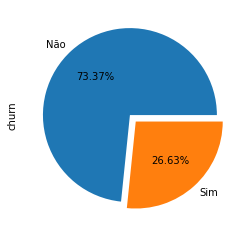

In [101]:
dados_organizado.churn.value_counts(normalize = True).plot(kind = 'pie', autopct='%.2f%%', explode = (0,0.1))

### Configurando Histograma sobre duração de contrato

Text(0, 0.5, 'Número de Clientes')

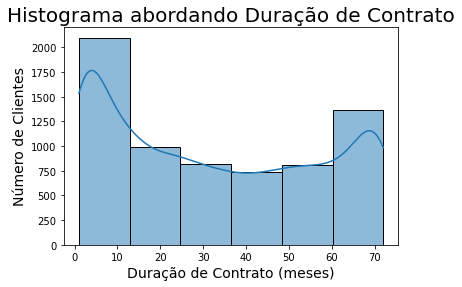

In [103]:
ax = sns.histplot(x = dados_organizado.duracao_contrato, bins = 6, kde = True,)
ax.axes.set_title('Histograma abordando Duração de Contrato', fontsize = 20)
ax.set_xlabel('Duração de Contrato (meses)', fontsize = 14)
ax.set_ylabel('Número de Clientes', fontsize = 14)

### Configurando Boxplot do custo diário

In [70]:
dados_organizado.custo_diario.describe()

count    6819.000000
mean        2.162319
std         1.003610
min         0.610000
25%         1.185000
50%         2.350000
75%         3.000000
max         3.960000
Name: custo_diario, dtype: float64

Text(0.5, 0, 'Custo Diário')

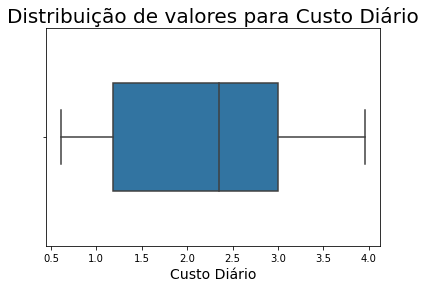

In [79]:
ax = sns.boxplot(x = dados_organizado.custo_diario, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valores para Custo Diário', fontsize = 20)
ax.set_xlabel('Custo Diário', fontsize = 14)

### Configurando Boxplot do custo mensal

In [74]:
dados_organizado.custo_mensal.describe()

count    6819.000000
mean       64.871161
std        30.105254
min        18.250000
25%        35.575000
50%        70.400000
75%        89.900000
max       118.750000
Name: custo_mensal, dtype: float64

Text(0.5, 0, 'Custo Mensal')

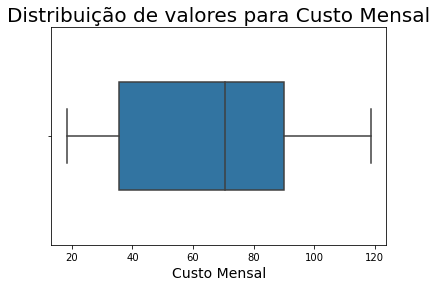

In [77]:
ax = sns.boxplot(x = dados_organizado.custo_mensal, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valores para Custo Mensal', fontsize = 20)
ax.set_xlabel('Custo Mensal', fontsize = 14)

### Configurando Boxplot do custo total

Text(0.5, 0, 'Custo Total')

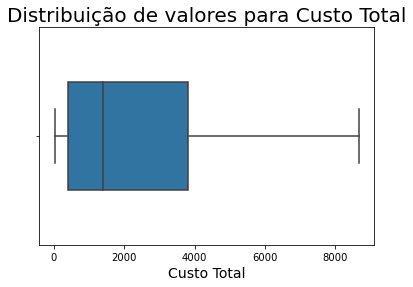

In [78]:
ax = sns.boxplot(x = dados_organizado.custo_total, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valores para Custo Total', fontsize = 20)
ax.set_xlabel('Custo Total', fontsize = 14)